<a href="https://colab.research.google.com/github/bellun/Code_review_PEP8/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

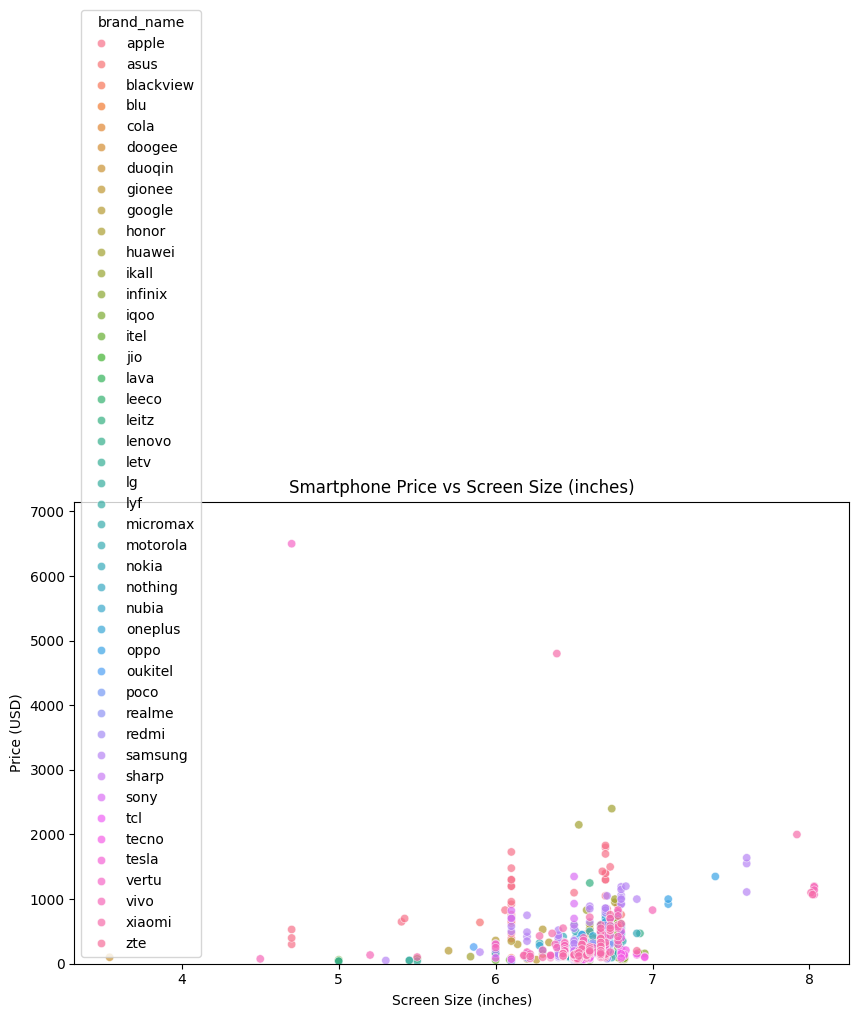

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def prepare_smartphone_data(file_path):
    """
    Prepare smartphone data for visualization by applying transformations.

    The transformations include:
        - Selecting only relevant columns for analysis
        - Removing records with missing battery capacity or OS values
        - Converting price from cents to dollars

    Args:
        file_path (str): Path to the raw smartphone data CSV file

    Returns:
        pd.DataFrame: Cleaned DataFrame with the applied transformations

    Raises:
        FileNotFoundError: If the input file doesn't exist
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Smartphone data file not found at {file_path}")

    # Define columns to keep
    relevant_columns = [
        "brand_name",
        "os",
        "price",
        "avg_rating",
        "processor_speed",
        "battery_capacity",
        "screen_size"
    ]

    # Read and process data
    raw_data = pd.read_csv(file_path)
    cleaned_data = (
        raw_data.loc[:, relevant_columns]
        .dropna(subset=["battery_capacity", "os"])
        .assign(price=lambda x: x["price"] / 100)  # Convert cents to dollars
    )

    return cleaned_data


def visualize_versus_price(data, x_column, ax=None):
    """
    Create a scatter plot comparing a specified column against price.

    Args:
        data (pd.DataFrame): The cleaned smartphone data
        x_column (str): Column name to plot against price
        ax (matplotlib.axes.Axes, optional): Axes to plot on

    Returns:
        matplotlib.axes.Axes: The axes with the plot
    """
    if ax is None:
        ax = plt.gca()

    sns.scatterplot(
        data=data,
        x=x_column,
        y="price",
        hue="brand_name",
        alpha=0.7,
        ax=ax
    )

    ax.set(
        title=f"Smartphone Price vs {column_to_label(x_column)}",
        xlabel=column_to_label(x_column),
        ylabel="Price (USD)",
        ylim=(0, data["price"].max() * 1.1)
    )

    return ax


def column_to_label(column_name):
    """
    Convert DataFrame column names to readable labels for plots.

    Args:
        column_name (str): The column name to convert

    Returns:
        str: Human-readable label
    """
    label_map = {
        "brand_name": "Brand",
        "os": "Operating System",
        "avg_rating": "Average Rating",
        "processor_speed": "Processor Speed (GHz)",
        "battery_capacity": "Battery Capacity (mAh)",
        "screen_size": "Screen Size (inches)"
    }

    return label_map.get(column_name, column_name.replace("_", " ").title())


# Example usage
if __name__ == "__main__":
    try:
        cleaned_data = prepare_smartphone_data("./data/smartphones.csv")

        # Create visualization
        fig, ax = plt.subplots(figsize=(10, 6))
        visualize_versus_price(cleaned_data, "screen_size", ax=ax)
        plt.show()

    except Exception as e:
        print(f"Error processing data: {e}")

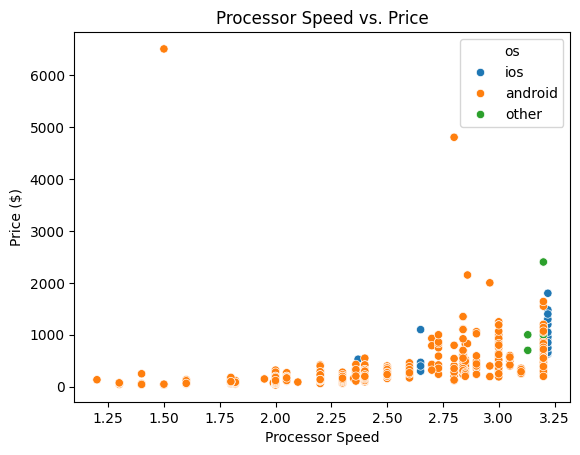

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


def column_to_label(column_name):
    """
    Converte um nome de coluna em um DataFrame do pandas em uma string que pode ser
    usada como rótulo em um gráfico.

    :param column_name: string contendo o nome original da coluna
    :return: string pronta para ser apresentada em um gráfico
    """

    # Validate that column_name is a string
    if isinstance(column_name, str):
        return " ".join(column_name.split("_")).title()

    # If the value provided is not a string, raise an Exception
    else:
        raise Exception("Please makes sure to pass a value of type 'str'.")


def visualize_versus_price(clean_data, x):
    """
    Use seaborn e matplotlib para identificar um padrão entre avg_rating e
    battery_capacity.

    :param clean_data: um DataFrame pandas contendo dados limpos de smartphones
    :param x: variável a ser plotada no eixo x
    :return: nome
    """

    # Create the scatterplot
    sns.scatterplot(x=x, y="price", data=clean_data, hue="os")

    # Add x and y labels
    plt.xlabel(" ".join(x.split("_")).title())
    plt.ylabel("Price ($)")

    # Add a title to the plot
    plt.title(f"{' '.join(x.split('_')).title()} vs. Price")


# Call the visualize_versus_price function
visualize_versus_price(cleaned_data, "processor_speed")


In [8]:
# Import required packages
import pytest
import ipytest

ipytest.config.rewrite_asserts = True
__file__ = "notebook.ipynb"


# Create a clean DataFrame fixture
@pytest.fixture()
def clean_smartphone_data():
    return prepare_smartphone_data("./data/smartphones.csv")


def test_nan_values(clean_smartphone_data):
    """
    Test for no NaN value for "battery_capacity" or "os"
    """

    # Assert there are no NaN value in "battery_capacity" or "os"
    assert clean_smartphone_data["battery_capacity"].isnull().sum() == 0
    assert not clean_smartphone_data["os"].isnull().sum() == 0


ipytest.run("-qq")


F                                                                                            [100%]
============================================= FAILURES =============================================
_________________________________________ test_nan_values __________________________________________

clean_smartphone_data =     brand_name       os    price  avg_rating  processor_speed  \
0        apple      ios   389.99         7.3         ...5020.0         6.67  
978            4200.0         6.90  
979            5000.0         6.80  

[955 rows x 7 columns]

    def test_nan_values(clean_smartphone_data):
        """
        Test for no NaN value for "battery_capacity" or "os"
        """
    
        # Assert there are no NaN value in "battery_capacity" or "os"
        assert clean_smartphone_data["battery_capacity"].isnull().sum() == 0
>       assert not clean_smartphone_data["os"].isnull().sum() == 0
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
E       Asse

<ExitCode.TESTS_FAILED: 1>

In [7]:
%pip install ipytest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.9 MB/s eta 0:00:00
